<a href="https://colab.research.google.com/github/Eduarmma19/videos_youtube/blob/main/Everton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS JUGADORES DEL EVERTON
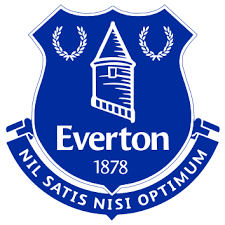

## Librerías a usar 

In [ ]:
install.packages("ggthemes")
library(ggthemes)

In [173]:
library(rvest)
library(dplyr)
library(ggplot2)
library(tidyverse)
url <- "https://www.premierleague.com/clubs/7/Everton/squad"
pagina_everton <- read_html(url)

In [189]:
nombres <- pagina_everton %>% html_nodes(".name")%>%html_text()
nombres <- nombres[21:47]
nacionalidad <- pagina_everton %>% html_nodes(".nationality .info") %>% html_text()
apariciones <- pagina_everton %>% html_nodes(".nationality+ li .info") %>% html_text()
posicion <- pagina_everton %>% html_nodes(".position")%>% html_text()

In [190]:
df <- data.frame(nombres,nacionalidad,apariciones,posicion)
df$apariciones <- as.numeric(df$apariciones)
df$nombres <- as.character(df$nombres)

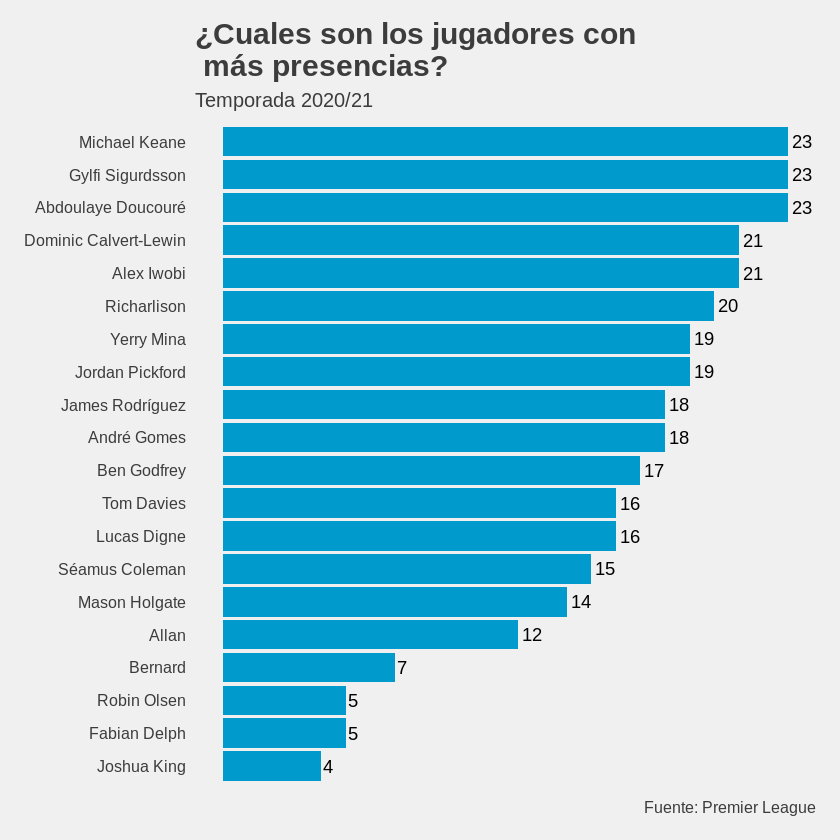

In [191]:
p <- df %>% filter(apariciones >1)  %>%mutate(nombres = reorder(nombres,apariciones)) %>% ggplot()+ 
  aes(x = nombres, y = apariciones) + geom_bar(stat = "identity", fill = "deepskyblue3") + coord_flip() + theme_fivethirtyeight()+
  geom_text(aes(label = apariciones),hjust = -0.2) +
   labs(title = "¿Cuales son los jugadores con \n más presencias?",subtitle = "Temporada 2020/21",caption = "Fuente: Premier League") + 
   theme(panel.grid.major = element_blank(),axis.text.x = element_blank())
p

In [192]:
df_jugadores <- df %>% filter(posicion != "Goalkeeper")
links_jugador <- pagina_everton %>% html_nodes("div.wrapper.col-12 > div > ul > li:nth-child(5) > a") %>% html_attr("href")

In [193]:
links_jugadores <- c()
jugadores <- c()
for (n_jugador in seq(from = 27,to = 5,by = -1)){
  x <- paste0("#mainContent > div.wrapper.col-12 > div > ul > li:nth-child(",n_jugador,") > a")
  links_jugadores <- c(links_jugadores,x)

  jugadores <- c(pagina_everton %>%html_nodes(x)%>% html_attr("href"),jugadores)
}


In [ ]:
v <- str_replace(jugadores,"overview","stats?co=1&se=363")
completo <- paste0("premierleague.com",v)
completo